<a href="https://colab.research.google.com/github/rennyatwork/CegepSteFoy_IA/blob/main/08_deep_learning/CNN_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### from the book AI and Deep Learning (Steven d'Ascoli)

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from keras.datasets import cifar10

In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

# Transform pixel values to be between 0 and 1
X_train, X_test = X_train/255.0, X_test/255.0

170498071/170498071 [==============================] - 4s 0us/step


In [5]:
### creating the model

# The first layer will have 50 filters. The filter size is 2 X 2
# Max pooling is then used to reduce the spatial dimensions of
#  the output volume on the next line.
CNN_model = models.Sequential()

## input_shape=(32, 32, 3) --> 32x 32 = fig dimension, 3 = RGB
CNN_model.add(layers.Conv2D(50, (2, 2), activation='relu',\
input_shape=(32, 32, 3)))

### MaxPooling (3,3) reduces dimmensionality from 32x32 to 3x3
CNN_model.add(layers.MaxPooling2D((3, 3)))

### Transform into 1-dim to input into CNN
CNN_model.add(layers.Flatten())

CNN_model.add(layers.Dense(50, activation='relu'))
CNN_model.add(layers.Dropout(.1))

### 10 = 10 categories of output (airplane, automobile, ..., truck)
CNN_model.add(layers.Dense(10, activation='softmax'))


optimizer = tf.optimizers.Adam(learning_rate = .005)
CNN_model.compile(optimizer=optimizer,

          loss=tf.keras.losses.SparseCategoricalCrossentropy
         (from_logits=False),metrics=['accuracy'])

In [6]:
history = CNN_model.fit(X_train, Y_train, epochs=5,
          validation_data=( X_test, Y_test))

Epoch 1/5
1563/1563 [==============================] - 40s 25ms/step - loss: 1.5832 - accuracy: 0.4242 - val_loss: 1.3537 - val_accuracy: 0.5194
Epoch 2/5
1563/1563 [==============================] - 44s 28ms/step - loss: 1.3710 - accuracy: 0.5114 - val_loss: 1.3029 - val_accuracy: 0.5379
Epoch 3/5
1563/1563 [==============================] - 40s 26ms/step - loss: 1.3223 - accuracy: 0.5287 - val_loss: 1.2566 - val_accuracy: 0.5565
Epoch 4/5
1563/1563 [==============================] - 39s 25ms/step - loss: 1.2856 - accuracy: 0.5428 - val_loss: 1.2310 - val_accuracy: 0.5648
Epoch 5/5
1563/1563 [==============================] - 40s 26ms/step - loss: 1.2578 - accuracy: 0.5525 - val_loss: 1.2392 - val_accuracy: 0.5610


313/313 - 2s - loss: 1.2392 - accuracy: 0.5610 - 2s/epoch - 7ms/step
0.5609999895095825
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 31, 31, 50)        650       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 50)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5000)              0         
                                                                 
 dense_2 (Dense)             (None, 50)                250050    
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (No

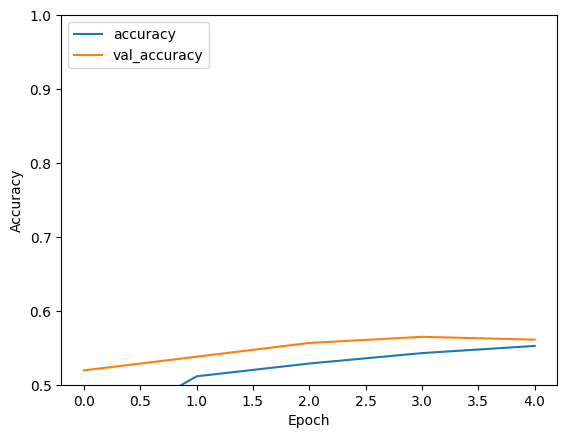

In [7]:
#Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='upper left')
test_loss, test_acc = CNN_model.evaluate(X_test,  Y_test,\
verbose=2)
print(test_acc)


#show model’s structure
CNN_model.summary()

In [8]:
#create an array that predicts what the category of each image #from the test_image array and then print out the prediction for #the 10th image. (predictions[9]) refers to the #10th image since #the #index of an array in python starts with 0.
predictions = CNN_model.predict(X_test)
tenth_prediction = (predictions[9])
print(tenth_prediction)

#The output from the code above consists of probability #distributions between zero and
#one.

313/313 [==============================] - 4s 12ms/step
[7.7085127e-03 7.9906583e-01 1.0750904e-03 9.0334179e-05 2.1145954e-05
 2.9493342e-05 1.8353107e-04 1.2514024e-04 7.7281035e-03 1.8397276e-01]


In [13]:
sorted_arr = np.sort(tenth_prediction)
sorted_arr

array([2.1145954e-05, 2.9493342e-05, 9.0334179e-05, 1.2514024e-04,
       1.8353107e-04, 1.0750904e-03, 7.7085127e-03, 7.7281035e-03,
       1.8397276e-01, 7.9906583e-01], dtype=float32)

In [9]:
import numpy as np
#print out the index of the array which contains the highest #probability distribution
prediction = (np.argmax(predictions[9]))
print(prediction)


#The index with the highest number will be the
#predicted output.
#The indexes of our input data are as follows:

#  0	airplane
#  1	automobile
#  2	bird
#  3	cat
#  4	deer
#  5	dog
#  6	frog
#  7	horse
#  8	ship
#  9	truck

1


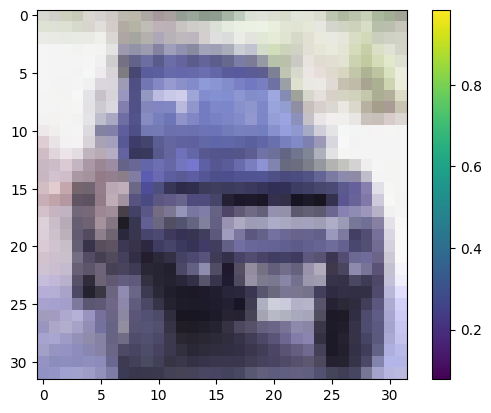

In [10]:
plt.figure()
plt.imshow(X_test[9])
plt.colorbar()
plt.grid(False)
plt.show()